<a href="https://colab.research.google.com/github/briandankowski/GuidedCapstone/blob/master/Final_GuidedCapstoneStep6HL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [ ]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
os.listdir()

['.config', 'sample_data']

In [ ]:
!mkdir data
!mkdir figures
!mkdir models
from google.colab import files
files.upload()

Saving step3_output.csv to step3_output.csv


{'step3_output.csv': b"Name,state,summit_elev,vertical_drop,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters\nAlyeska Resort,Alaska,3939,2500,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,0\nEaglecrest Ski Area,Alaska,2600,1540,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,0\nHilltop Ski Area,Alaska,2090,294,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0\nArizona Snowbowl,Arizona,11500,2300,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1\nSunrise Park Resort,Arizona,11100,1800,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1\nYosemite Ski & Snowboard Area,California,7800,600,0,0,1,3,1,5,10.0,2.0,0.4,88.0,174.87323943661968,110.0,84.0,300.0,47.0,47.0,107.0,0.0,1\nBear Mountain,

In [ ]:
os.listdir()

['.config', 'models', 'step3_output.csv', 'data', 'figures', 'sample_data']

In [ ]:
!rm 'step3_output (1).csv'

rm: cannot remove 'step3_output (1).csv': No such file or directory


In [ ]:
os.listdir()

['.config', 'models', 'step3_output.csv', 'data', 'figures', 'sample_data']

In [ ]:
os.getcwd()

'/content'

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [ ]:
df = pd.read_csv('step3_output.csv', index_col= None)

In [ ]:
# select object type columns
df = pd.concat([df.drop('state', axis=1), pd.get_dummies(df['state'])], axis=1)
df.head()

,Name,summit_elev,vertical_drop,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters,Alaska,Arizona,California,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Maine,Maryland,Massachusetts,Michigan,Minnesota,Missouri,Montana,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,Ohio,Oregon,Pennsylvania,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Alyeska Resort,3939,2500,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Eaglecrest Ski Area,2600,1540,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hilltop Ski Area,2090,294,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Arizona Snowbowl,11500,2300,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sunrise Park Resort,11100,1800,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

# Declare an explanatory variable, called x,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
x = df.drop(['Name','AdultWeekend'], axis=1)
print(x)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df['AdultWeekend']

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter x 
scaler = preprocessing.StandardScaler().fit(x)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter x 
x_scaled=scaler.transform(x)

     summit_elev  vertical_drop  fastQuads  ...  West Virginia  Wisconsin  Wyoming
0           3939           2500          2  ...              0          0        0
1           2600           1540          0  ...              0          0        0
2           2090            294          0  ...              0          0        0
3          11500           2300          0  ...              0          0        0
4          11100           1800          1  ...              0          0        0
..           ...            ...        ...  ...            ...        ...      ...
325         9500           1000          0  ...              0          0        1
326         7428            810          0  ...              0          0        1
327         7808           1571          0  ...              0          0        1
328         9663            990          0  ...              0          0        1
329         9500           1100          0  ...              0          0        1

[33

In [ ]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()
# Call the train_test_split() function with the first two parameters set to x_scaled and y 
# Declare four variables, s_train, s_test, y_train and y_test separated by commas 
s_train, s_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=1)

In [ ]:
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(s_train,y_train)

In [ ]:
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred = model.predict(s_test)
y_pred

array([ 57.92905836,  91.47593336,  79.14780836,  76.33530836,
        68.92905836,  77.86655836,  43.06968336,  47.75718336,
        91.58530836,  85.94468336,  51.53843336,  76.36655836,
        50.05405836,  70.44468336,  63.24155836,  91.77280836,
        42.88218336,  73.74155836,  63.19468336,  41.71030836,
       114.22593336,  37.77280836,  54.11655836,  49.16343336,
        48.96030836,  60.58530836,  77.29429273,  67.99155836,
        62.39780836,  66.52280836,  34.71030836,  58.46030836,
        80.64780836,  57.91343336,  75.91343336,  49.52280836,
        24.11655836,  29.64780836,  60.02280836,  38.42905836,
        49.85093336,  61.41929273,  87.92905836,  71.35093336,
        71.69468336,  59.28843336,  60.80405836, 166.64780836,
        35.19468336,  60.04429273,  66.17905836,  61.63218336,
        51.46030836,  43.91343336,  60.29429273,  42.89780836,
        85.41929273,  36.63218336, 120.13218336, 120.75718336,
        56.24155836,  52.73179273,  41.46030836,  81.11

In [ ]:
# You might want to use the explained_variance_score() and mean_absolute_error() metrics.
# To do so, you will need to import them from sklearn.metrics. 
# You can plug y_test and y_pred into the functions to evaluate the model
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [ ]:
explained_variance_score(y_true=y_test, y_pred=y_pred)

0.9416576172466851

In [ ]:
mean_absolute_error(y_true=y_test, y_pred=y_pred)

4.84926757962234

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [ ]:
wf = df[df['Name'].str.contains('Whitefish Mountain Resort')]
wf

,Name,summit_elev,vertical_drop,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters,Alaska,Arizona,California,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Maine,Maryland,Massachusetts,Michigan,Minnesota,Missouri,Montana,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,Ohio,Oregon,Pennsylvania,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
151,Whitefish Mountain Resort,6817,2353,3,2,6,0,3,14,105.0,4.0,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [ ]:
wf1 = wf.drop(['Name','AdultWeekend'], axis=1)
print(wf1)

     summit_elev  vertical_drop  fastQuads  ...  West Virginia  Wisconsin  Wyoming
151         6817           2353          3  ...              0          0        0

[1 rows x 55 columns]


**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [ ]:
x = wf1
x_scaled=scaler.transform(x)

In [ ]:
wf1_pred = model.predict(x_scaled)
print(wf1_pred)

[82.75669508]


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [ ]:
wf['AdultWeekend']

151    81.0
Name: AdultWeekend, dtype: float64

### **<font color='teal'> Extra Credit: Lets see if an extra 'fastQuads' lift effects the predicted value of the ticket price?**

In [ ]:
wfq = wf.copy()

In [ ]:
wfq.at[151,'fastQuads'] = 4

In [ ]:
wfq['fastQuads']

151    4
Name: fastQuads, dtype: int64

In [ ]:
wf['fastQuads']

151    3
Name: fastQuads, dtype: int64

In [ ]:
wfq

,Name,summit_elev,vertical_drop,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters,Alaska,Arizona,California,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Maine,Maryland,Massachusetts,Michigan,Minnesota,Missouri,Montana,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,Ohio,Oregon,Pennsylvania,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
151,Whitefish Mountain Resort,6817,2353,4,2,6,0,3,14,105.0,4.0,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
wfq1 = wfq.drop(['Name','AdultWeekend'], axis=1)
print(wfq1)

     summit_elev  vertical_drop  fastQuads  ...  West Virginia  Wisconsin  Wyoming
151         6817           2353          4  ...              0          0        0

[1 rows x 55 columns]


In [ ]:
xq = wfq1
xq_scaled=scaler.transform(xq)

In [ ]:
wfq1_pred = model.predict(xq_scaled)
print(wfq1_pred)

[83.13950758]


| AdultWeekend Ticket Price | Description |
| --- | --- |
| 81.00 | Actual Price |
| 82.76 | Predicted Price (Model 1) |
| 83.14 | fastQuads Adjustment (Model 1) |

**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

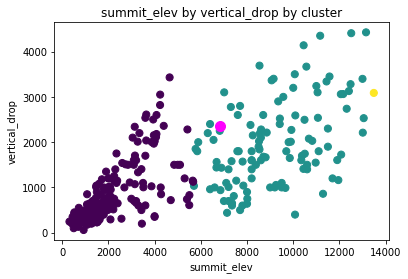

In [ ]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(wf['summit_elev'], wf['vertical_drop'], c='magenta', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

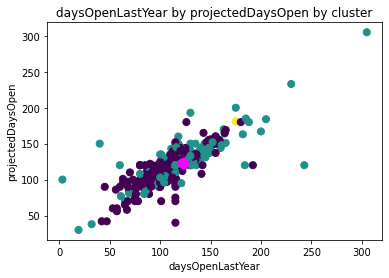

In [ ]:
plt.scatter(df['daysOpenLastYear'], df['projectedDaysOpen'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(wf['daysOpenLastYear'], wf['projectedDaysOpen'], c='magenta', s=100)
plt.xlabel('daysOpenLastYear')
plt.ylabel('projectedDaysOpen')
plt.title('daysOpenLastYear by projectedDaysOpen by cluster')
plt.savefig('figures/fig2.png',bbox_inches='tight')

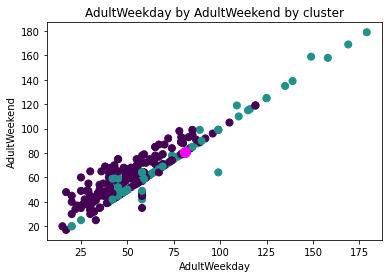

In [ ]:
plt.scatter(df['AdultWeekday'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(wf['AdultWeekday'], wf['AdultWeekend'], c='magenta', s=100)
plt.xlabel('AdultWeekday')
plt.ylabel('AdultWeekend')
plt.title('AdultWeekday by AdultWeekend by cluster')
plt.savefig('figures/fig3.png',bbox_inches='tight')

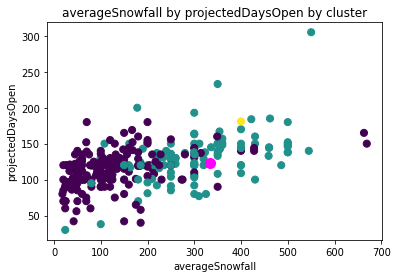

In [ ]:
plt.scatter(df['averageSnowfall'], df['projectedDaysOpen'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(wf['averageSnowfall'], wf['projectedDaysOpen'], c='magenta', s=100)
plt.xlabel('averageSnowfall')
plt.ylabel('projectedDaysOpen')
plt.title('averageSnowfall by projectedDaysOpen by cluster')
plt.savefig('figures/fig4.png',bbox_inches='tight')

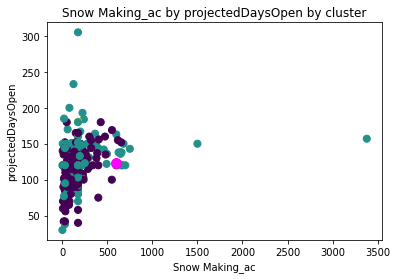

In [ ]:
plt.scatter(df['Snow Making_ac'], df['projectedDaysOpen'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(wf['Snow Making_ac'], wf['projectedDaysOpen'], c='magenta', s=100)
plt.xlabel('Snow Making_ac')
plt.ylabel('projectedDaysOpen')
plt.title('Snow Making_ac by projectedDaysOpen by cluster')
plt.savefig('figures/fig5.png',bbox_inches='tight')

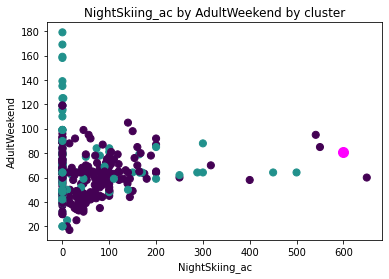

In [ ]:
plt.scatter(df['NightSkiing_ac'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(wf['NightSkiing_ac'], wf['AdultWeekend'], c='magenta', s=100)
plt.xlabel('NightSkiing_ac')
plt.ylabel('AdultWeekend')
plt.title('NightSkiing_ac by AdultWeekend by cluster')
plt.savefig('figures/fig6.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [ ]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

In [ ]:
os.listdir()

['.config', 'models', 'step3_output.csv', 'data', 'figures', 'sample_data']

In [ ]:
cd 'models'

/content/models


In [ ]:
os.listdir()

['regression_model_adultweekend.joblib']

In [ ]:
 cd ..

/content


In [ ]:
cd 'figures'

/content/figures


In [ ]:
os.listdir()

['fig1.png', 'fig2.png', 'fig6.png', 'fig5.png', 'fig3.png', 'fig4.png']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients of the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [ ]:
coef_data1 = []
coef_data1 = pd.DataFrame(abs(lm.coef_), x.columns, columns=['Coefficient'])
coef_data1 = coef_data1.sort_values(['Coefficient'], ascending=False)
print(coef_data1)

                    Coefficient
New York           4.725201e+13
Michigan           4.459307e+13
Colorado           3.928907e+13
California         3.844802e+13
Pennsylvania       3.668953e+13
New Hampshire      3.383062e+13
Wisconsin          3.383062e+13
Vermont            3.280847e+13
Minnesota          3.174627e+13
Utah               3.063983e+13
Idaho              2.948420e+13
Montana            2.948420e+13
Massachusetts      2.827332e+13
Washington         2.699977e+13
Oregon             2.699977e+13
Maine              2.565422e+13
New Mexico         2.565422e+13
Wyoming            2.422468e+13
North Carolina     2.104424e+13
Connecticut        1.924030e+13
Ohio               1.924030e+13
West Virginia      1.723550e+13
Virginia           1.723550e+13
Illinois           1.723550e+13
Nevada             1.723550e+13
Iowa               1.494926e+13
Alaska             1.494926e+13
New Jersey         1.222467e+13
Missouri           1.222467e+13
Indiana            1.222467e+13
South Da

In [ ]:
coef_dataT = coef_data1.T
print(coef_dataT)

                 New York      Michigan  ...  SkiableTerrain_ac  yearsOpen
Coefficient  4.725201e+13  4.459307e+13  ...           0.012741   0.008975

[1 rows x 55 columns]


| Model | Explained Variance| Mean Absolute Error|Features Dropped|
| --- | --- | --- | --- |
| Model 1. | 0.9417 |  4.85 |'base_elev'|
| Model 2. | 0.9363 |  5.08 |'state' base_elev'|
| Model 3. | 0.9364 |  5.11 |'state' 'summit_elev' 'base_elev'|
| Model 4. | 0.9262 |  5.46 |'state' 'summit_elev' 'base_elev' 'clusters'|
| Model 5. | 0.3643 | 14.75 |'state' 'summit_elev' 'base_elev' 'clusters' 'AdultWeekday'|

In [ ]:
data_entry = [['Model 1', 0.9417, 4.85],['Model 2', 0.9363, 5.08],['Model 3', 0.9364, 5.11],['Model 4', 0.9262, 5.46],['Model 5', 0.3643, 14.75]]
model_performance_df = pd.DataFrame(data_entry, columns = ['Model', 'Explained Variance', 'Mean Absolute Error'])
print(model_performance_df) 

     Model  Explained Variance  Mean Absolute Error
0  Model 1              0.9417                 4.85
1  Model 2              0.9363                 5.08
2  Model 3              0.9364                 5.11
3  Model 4              0.9262                 5.46
4  Model 5              0.3643                14.75


In [ ]:
coef_data1.to_csv('model_1_coefficients.csv', index=True)
model_performance_df.to_csv('model_performance.csv', index=False) 
from google.colab import files
files.download('model_1_coefficients.csv')
files.download('model_performance.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>